In [21]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [22]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [23]:
df_xo = df.drop (columns = ['koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_time0bk_err2', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth_err1', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2'])
df_xo.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_impact_err1,koi_duration,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,0.059,4.50700,...,443,9.11,25.8,2,5455,4.467,0.927,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,5.126,1.78220,...,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,0.115,2.40641,...,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,0.235,1.65450,...,1406,926.16,40.9,1,6031,4.438,1.046,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,172.979370,0.762,0.139,3.14020,...,1160,427.65,40.2,2,6046,4.486,0.972,296.28613,48.224670,15.714


# Select your features (columns)

In [24]:
# Set features. This will also be used as your x values.
selected_features = df_xo[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_slogg', 'ra', 'dec', 'koi_kepmag']]

In [25]:
X = selected_features
y = df_xo["koi_disposition"]
print(X.shape, y.shape)

(6991, 20) (6991,)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [26]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y)

In [27]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_slogg,ra,dec,koi_kepmag
6080,1,0,0,0,12.496435,132.035800,1.1700,84.32000,271.7,55.34,1397,899.44,141.5,1,6821,3.805,3.805,289.23080,44.412483,13.054
3001,0,0,0,0,11.615625,131.968430,0.9770,2.23300,191.2,2.84,905,158.69,8.8,2,5332,4.083,4.083,293.52756,41.111439,15.162
570,0,1,0,0,10.980246,137.137607,0.7330,3.74464,50078.0,21.94,821,107.47,1555.4,1,5952,4.462,4.462,282.79764,43.578129,14.212
4897,1,0,0,0,466.908240,136.373100,0.0868,2.64000,660.0,2.19,210,0.46,5.4,1,5340,4.456,4.456,297.65436,43.178551,15.202
625,0,1,1,1,1.061933,133.850441,0.7130,2.14290,133.6,2.29,2508,9391.15,80.2,1,6134,3.975,3.975,288.90253,44.632992,12.953


In [28]:
y_train.head()

6080    FALSE POSITIVE
3001         CANDIDATE
570     FALSE POSITIVE
4897    FALSE POSITIVE
625     FALSE POSITIVE
Name: koi_disposition, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.551
k: 3, Train/Test Score: 0.765/0.589
k: 5, Train/Test Score: 0.719/0.596
k: 7, Train/Test Score: 0.700/0.609
k: 9, Train/Test Score: 0.690/0.615
k: 11, Train/Test Score: 0.678/0.613
k: 13, Train/Test Score: 0.678/0.620
k: 15, Train/Test Score: 0.673/0.621
k: 17, Train/Test Score: 0.669/0.614
k: 19, Train/Test Score: 0.665/0.622


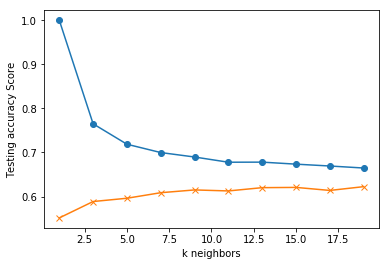

In [30]:
from sklearn.neighbors import KNeighborsClassifier 
    # Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [31]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.620


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [32]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10]}

grid = GridSearchCV(model3, param_grid, verbose=3)

In [33]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1, score=0.61441647597254, total=   0.8s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................... C=1, score=0.6807780320366132, total=   8.6s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


[CV] .................... C=1, score=0.6250715512306811, total=   4.5s
[CV] C=5 .............................................................
[CV] .................... C=5, score=0.6361556064073226, total=   4.0s
[CV] C=5 .............................................................
[CV] .................... C=5, score=0.6807780320366132, total=   8.6s
[CV] C=5 .............................................................
[CV] .................... C=5, score=0.6250715512306811, total=   4.7s
[CV] C=10 ............................................................
[CV] ................... C=10, score=0.6367276887871853, total=   5.4s
[CV] C=10 ............................................................
[CV] ................... C=10, score=0.7065217391304348, total=   8.8s
[CV] C=10 ............................................................
[CV] ................... C=10, score=0.6239267315397825, total=   4.8s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   50.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10]}, pre_dispatch='2*n_jobs', refit=True,
       return_train_score='warn', scoring=None, verbose=3)

In [34]:
predictions = grid.predict(X_test)

In [35]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10}
0.6557314514590883


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red", "green"]))

              precision    recall  f1-score   support

        blue       0.40      0.16      0.23       422
         red       0.50      0.69      0.58       450
       green       0.71      0.77      0.74       876

   micro avg       0.60      0.60      0.60      1748
   macro avg       0.53      0.54      0.51      1748
weighted avg       0.58      0.60      0.57      1748



# Save the Model

In [36]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'klif_borja_knn.sav'
joblib.dump(knn, filename)

['klif_borja_knn.sav']